In [1]:
import os

def load_documents_from_folder(folder_path):
    documents = []
    labels = []
    for category in os.listdir(folder_path):
        category_path = os.path.join(folder_path, category)
        if os.path.isdir(category_path):
            for filename in os.listdir(category_path):
                file_path = os.path.join(category_path, filename)
                with open(file_path, 'r', encoding='latin1') as f:
                    documents.append(f.read())
                    labels.append(category)
    return documents, labels

docs, labels = load_documents_from_folder(r"C:\Users\imran\OneDrive\Desktop\Celebal\20_newsgroups\20_newsgroups")
print(f"Loaded {len(docs)} documents from {len(set(labels))} categories")


Loaded 19997 documents from 20 categories


In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', max_df=0.5, min_df=2)
X = vectorizer.fit_transform(docs)


In [4]:
from sklearn.cluster import KMeans

#k-Means
k = 20  # or len(set(labels)
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

# top terms in each cluster
terms = vectorizer.get_feature_names_out()
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]

print("\nTop terms per cluster:")
for i in range(k):
    print(f"\nCluster {i}: ", end='')
    for ind in order_centroids[i, :10]:
        print(f'{terms[ind]}', end=' ')



Top terms per cluster:

Cluster 0: forsale hp misc sale ohio state computers magnus acs rec 
Cluster 1: space nasa digex sci gov access henry alaska astro toronto 
Cluster 2: israel israeli mideast jewish politics jews jake talk arab bony1 
Cluster 3: clipper org security crypt key eff encryption comp chip privacy 
Cluster 4: sys ibm mac comp hardware pc scsi drive apple card 
Cluster 5: ca ubc bnr canada bc hockey uwaterloo sfu uwo carleton 
Cluster 6: uk ac demon uknet pipex mantis cam dcs nott nz 
Cluster 7: god rutgers jesus christian bible faith people christians believe christ 
Cluster 8: sgi mchp sni ap horus frank objective livesey fido morality 
Cluster 9: ufl ifas gnv circa jrm 00 firearms comics lioness guns 
Cluster 10: windows os ms comp misc dos apps microsoft file motif 
Cluster 11: state ohio sci comp rec graphics cc au article nntp 
Cluster 12: baseball sport game hockey rec team buffalo games columbia year 
Cluster 13: talk politics misc alt guns religion people stat

In [5]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

#LDA Modelings

count_vectorizer = CountVectorizer(stop_words='english', max_df=0.5, min_df=2)
X_count = count_vectorizer.fit_transform(docs)

lda = LatentDirichletAllocation(n_components=20, random_state=42)
lda.fit(X_count)

# LDA topics
def print_lda_topics(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"\nTopic #{topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))

print_lda_topics(lda, count_vectorizer.get_feature_names_out(), 10)



Topic #0:
graphics ibm pitt se mil navy watson uiuc unc mail

Topic #1:
talk alt misc people politics article caltech atheism gun say

Topic #2:
cc state ohio stanford stratus article ti mps uchicago zaphod

Topic #3:
ca sport game hockey rec baseball team year games article

Topic #4:
ax max g9v b8f a86 145 pl 0d 1d9 34u

Topic #5:
soc culture talk politics turkish mideast jewish armenian jews israel

Topic #6:
state ohio rec ca hp sun car mps autos zaphod

Topic #7:
forsale drive misc scsi ibm mac state space sys hardware

Topic #8:
states new national university united 000 information political utk april

Topic #9:
comp windows pc sys graphics hardware ca ac dos card

Topic #10:
purdue ecn au cc article bu att state hp monash

Topic #11:
apple sandvik talk kent misc mac state article ohio don

Topic #12:
virginia uiuc 25 10 20 16 state fi upenn 15

Topic #13:
talk misc politics alt religion state article fbi guns ohio

Topic #14:
comp windows ms os misc nntp state host posting usen

In [6]:
pip install matplotlib seaborn scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


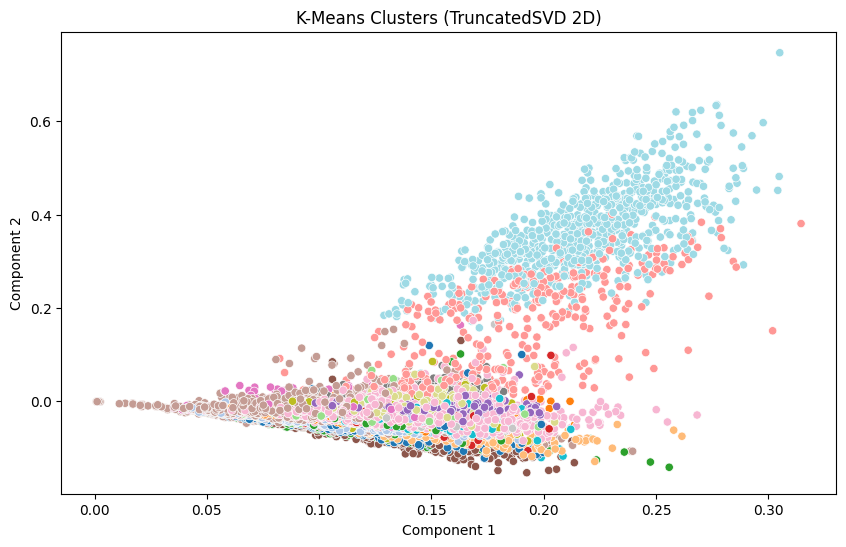

In [8]:
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
import seaborn as sns

svd = TruncatedSVD(n_components=2, random_state=42)
X_svd = svd.fit_transform(X)  # No toarray() needed

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_svd[:, 0], y=X_svd[:, 1], hue=kmeans.labels_, palette='tab20', legend=None)
plt.title("K-Means Clusters (TruncatedSVD 2D)")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()


In [9]:
pip install wordcloud matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


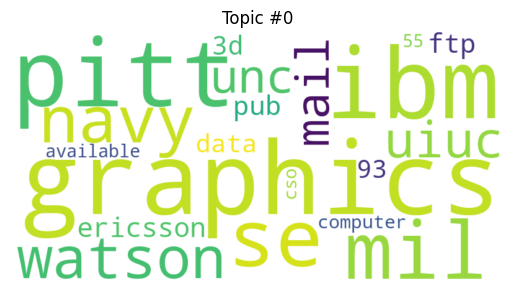

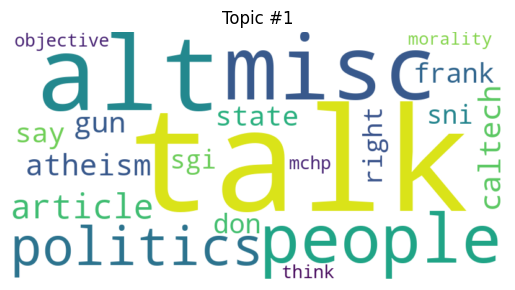

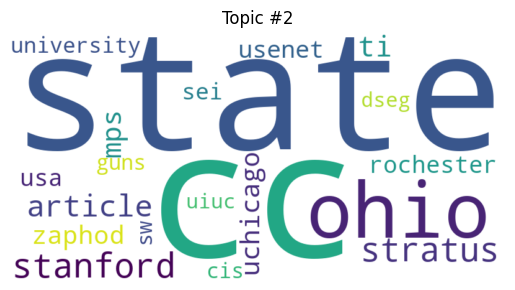

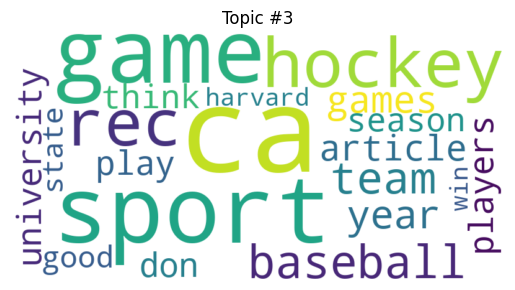

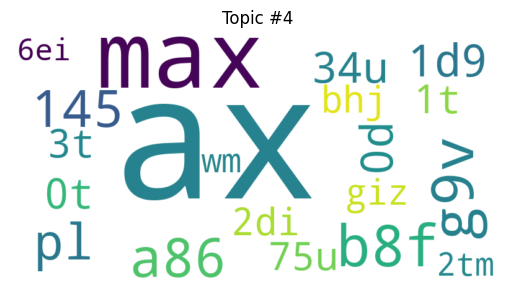

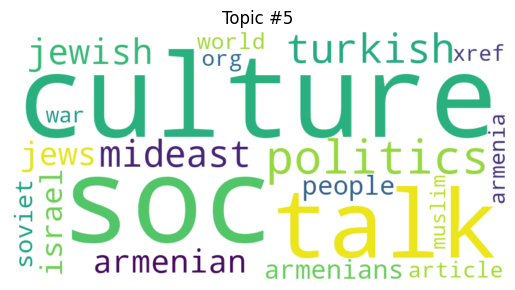

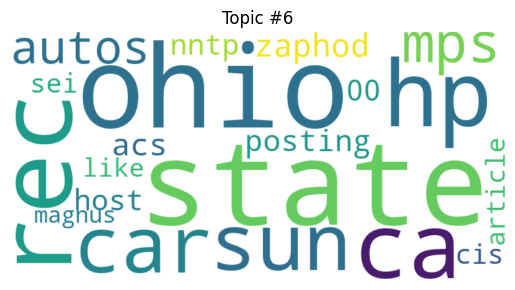

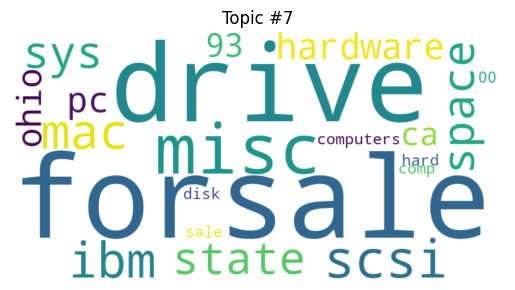

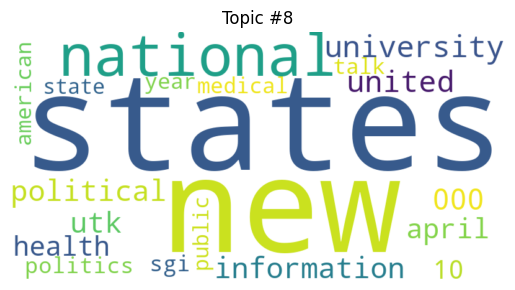

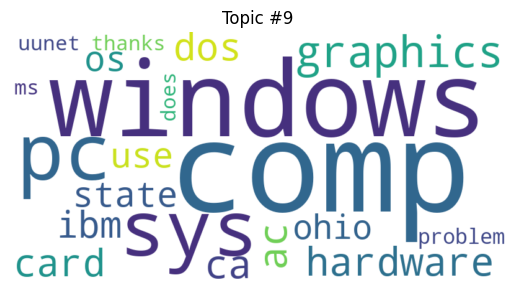

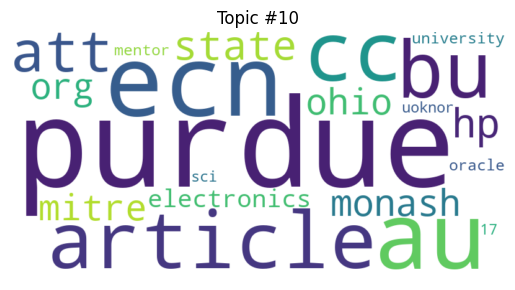

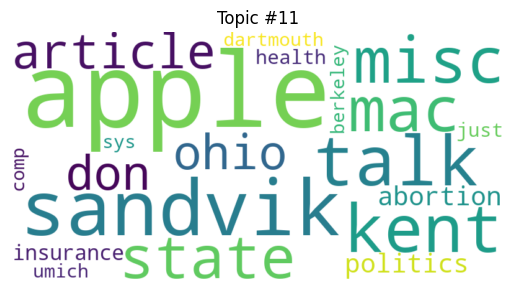

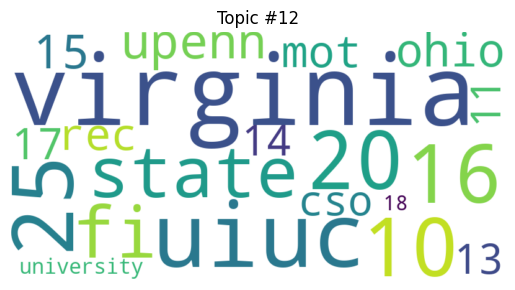

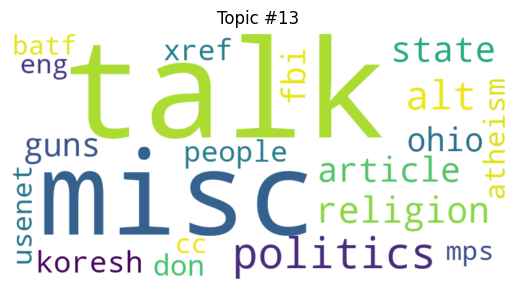

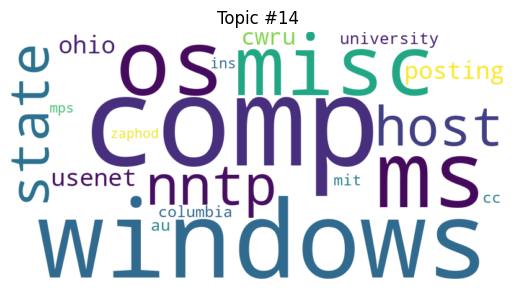

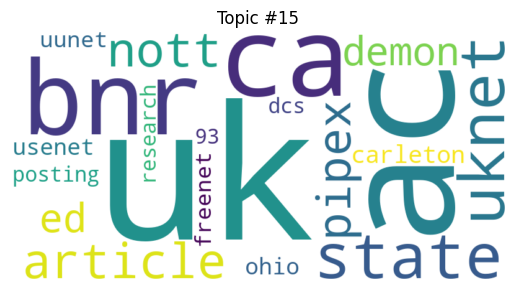

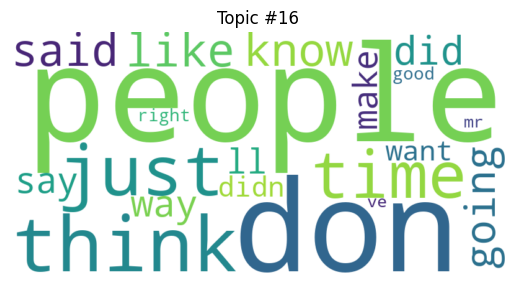

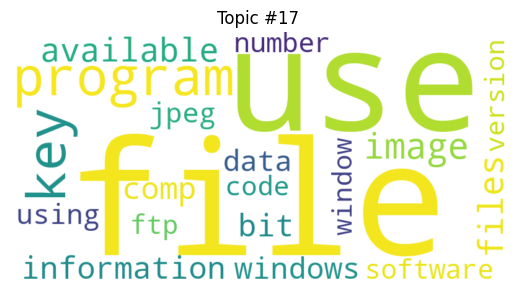

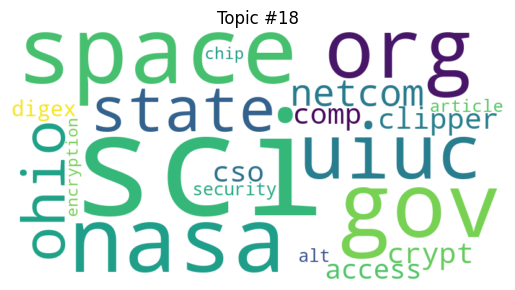

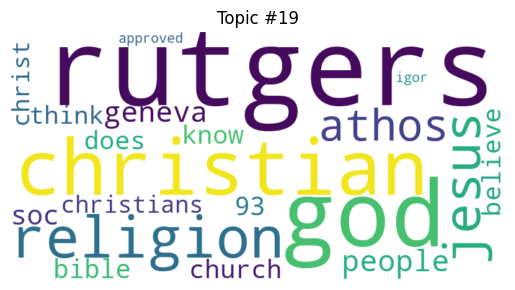

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_wordclouds(lda_model, feature_names, n_words=20):
    for topic_idx, topic in enumerate(lda_model.components_):
        wc = WordCloud(background_color='white', width=800, height=400)
        topic_words = {feature_names[i]: topic[i] for i in topic.argsort()[:-n_words - 1:-1]}
        wc.generate_from_frequencies(topic_words)

        plt.figure()
        plt.imshow(wc, interpolation='bilinear')
        plt.axis("off")
        plt.title(f"Topic #{topic_idx}")
        plt.show()

plot_wordclouds(lda, count_vectorizer.get_feature_names_out())


In [11]:
pip install pandas openpyxl

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
import pandas as pd

def save_lda_topics_to_excel(model, feature_names, n_words, filename="lda_topics.xlsx"):
    topics_data = []
    for topic_idx, topic in enumerate(model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-n_words - 1:-1]]
        topics_data.append([f"Topic {topic_idx}"] + top_words)

    df = pd.DataFrame(topics_data)
    df.to_excel(filename, index=False, header=False)

save_lda_topics_to_excel(lda, count_vectorizer.get_feature_names_out(), 10)